Adapted from: https://www.kaggle.com/datasets/shrutimechlearn/customer-data/data

#0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


The data presents customer details for Gender, Age, Annual Income and Spending Score.
The Genre column represents Gender and the Annual Income column is in the unit of thousand Dollars.
The spending score can be between 0 to 100.

Various genders and age groups can be associated with different spending habits and the data is useful for profile study and clustering analysis.

In [2]:
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

### Dataset Information

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Drop some irrelevant columns

ID ?

ZIP Code ?



In [7]:
#Add the exchange rate from Indian Rupees to USD
df.drop(columns=['CustomerID'],inplace=True)

In [8]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df['Genre'] = df['Genre'].map({'Male': 0,'Female': 1})

In [10]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


#3. Dataset Visualizations

### Visualize the price distribution

Text(0, 0.5, 'Frequency')

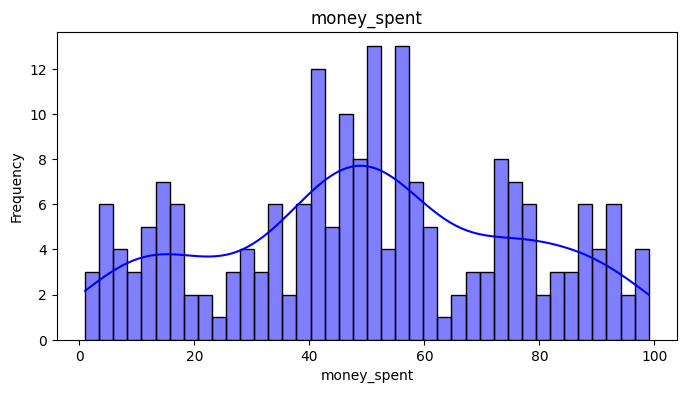

In [11]:
#Price Histogram
prices = df['Spending_Score']

# Create a histogram for the 'prices' variable
plt.figure(figsize=(8, 4))
sns.histplot(prices,bins=40, color='blue', kde=True)  # Using seaborn for histogram and KDE
plt.title('money_spent')
plt.xlabel('money_spent')
plt.ylabel('Frequency')

In [12]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


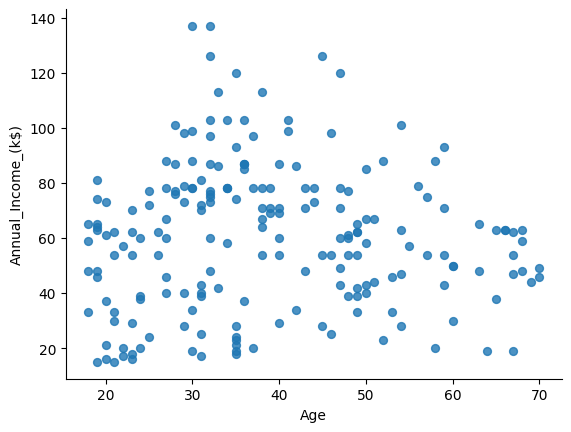

In [13]:
# @title Age vs Annual_Income_(k$)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Annual_Income_(k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#4. Preprocessing & Feature Engineering

In [14]:
numerical_variables = [feature for feature in df.columns if df[feature].dtype != 'object']

print(f'numerical variables: ', numerical_variables)

numerical variables:  ['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score']


## Scaling numerical variables

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_variables])


StandardScaler()

In [16]:
numerical_variables

['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score']

In [17]:

scaled_numerical_inputs = scaler.transform(df[numerical_variables])

In [18]:
scaled_numerical_inputs.shape

(200, 4)

In [19]:
# check if the means are around 0
scaled_numerical_inputs.mean(axis=0)

array([-7.54951657e-17, -1.02140518e-16, -2.13162821e-16, -1.46549439e-16])

In [20]:
# check if the stds are around 1
scaled_numerical_inputs.std(axis=0)

array([1., 1., 1., 1.])

## Joining the inputs

In [21]:
X = scaled_numerical_inputs

In [22]:
# check the shape of the joined array
X.shape

(200, 4)

#5. Model Setup & Training

## Initial Kmeans Model

In [23]:
# initialize the model
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5 ,  max_iter=400, random_state=42)

In [24]:
# train the model
kmeans_model.fit_predict(X);

#clusters = kmeans_model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [26]:
df["clusters"] = kmeans_model.labels_

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Age",
                    y="Annual_Income_(k$)",
                    z="Spending_Score",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

## What are the optimal parameters ?


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [28]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [29]:
# Find output for k values between 1 to 12
outputs = try_different_clusters(12, X)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [30]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [31]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 7,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 3, 2, 2, 2, 2, 6, 2, 0, 2, 0, 2, 6, 2, 0, 3, 2, 3, 0, 2, 3, 3,
       6, 3, 6, 3, 6, 3, 6, 2, 0, 2, 0, 3, 6, 2, 6, 2, 6, 2, 6, 3, 0, 2,
       6, 2, 6, 2, 2, 2, 6, 3, 2, 0, 6, 0, 6, 0, 2, 0, 0, 3, 6, 6, 0, 3,
       6, 6, 3, 2, 0, 6, 6, 6, 0, 3, 6, 3, 2, 6, 0, 3, 0, 6, 2, 0, 6, 2,
       2, 6, 6, 3, 0, 6, 2, 3, 6, 2, 0, 3, 2, 6, 0, 3, 0, 2, 6, 0, 0, 0,
       0, 2, 6, 3, 2, 2, 6, 6, 6, 6, 3, 6, 1, 5, 2, 1, 0, 5, 0, 5, 0, 5,
       2, 1, 4, 1, 4, 5, 4, 1, 6, 5, 2, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 6, 1, 4, 1, 0, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       0, 5, 0, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 5,
       4, 5], dtype=int32)

In [32]:
df["clusters_new"] = kmeans_model_new.labels_

In [33]:
# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters_new',
                    x="Age",
                    y="Annual_Income_(k$)",
                    z="Spending_Score",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4", "5", "6"]}
                    )
figure.update_layout()
figure.show()

### Other Models

In [79]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1., min_samples=2)


dbscan.fit_predict(X)

array([-1,  0, -1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  3,  0,  1,
        0,  0,  1,  3,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  4,  1,  1,  1,  1,  5,  4,  5])

In [80]:
df["clusters_dbscan"] = dbscan.labels_

In [81]:
# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters_dbscan',
                    x="Age",
                    y="Annual_Income_(k$)",
                    z="Spending_Score",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4", "5", "6"]}
                    )
figure.update_layout()
figure.show()